In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
# loading data as a DataFrame
df_survey_schema = pd.read_csv('survey_results_schema.csv')

df_answers = pd.read_csv('survey_results_public.csv', usecols=['Respondent', 'WorkWeekHrs', 'Age'], 
                         index_col = ['Respondent'])

df_answers.shape

(88883, 2)

In [57]:
# delete nan values
df_answers.dropna(inplace=True)
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60536 entries, 3 to 88883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WorkWeekHrs  60536 non-null  float64
 1   Age          60536 non-null  float64
dtypes: float64(2)
memory usage: 1.4 MB


In [58]:
pd.unique(df_answers['Age'])

array([28. , 22. , 30. , 42. , 23. , 31. , 26. , 29. , 38. , 47. , 34. ,
       32. , 21. , 25. , 35. , 44. , 27. , 43. , 62. , 37. , 45. , 18. ,
       33. , 19. , 24. , 36. , 39. , 64. , 41. , 49. , 54. , 40. , 56. ,
       58. , 46. , 51. , 48. , 16. , 57. , 52. , 50. , 23.9, 55. , 20. ,
       67. ,  1. , 53. , 59. , 69. , 65. , 63. , 61. , 17. , 70. , 60. ,
       46.5, 71. , 29.5, 68. , 26.5, 26.3, 72. , 66. , 75. , 15. , 24.5,
       99. , 43.5, 22.5, 31.5, 28.5, 33.6, 12. ,  2. , 73. , 30.8, 24.8,
       38.5, 10. , 90. , 61.3,  4. , 74. , 13. , 85. , 23.5, 77. , 20.9,
        3. , 14. , 37.5,  5. , 98. , 84. , 37.3, 31.4, 95. ])

In [59]:
df_answers = df_answers.astype('int64')

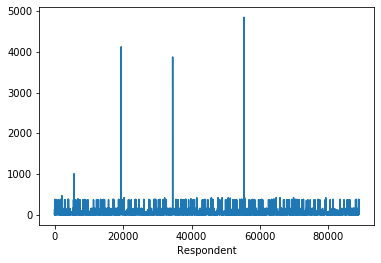

In [60]:
df_answers['WorkWeekHrs'].plot()
plt.show();

In [61]:
# removing outliers
df_answers = df_answers.loc[df_answers['WorkWeekHrs']<160]


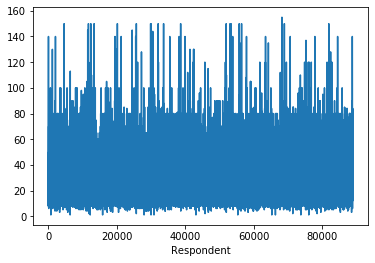

In [62]:
df_answers['WorkWeekHrs'].plot()
plt.show();

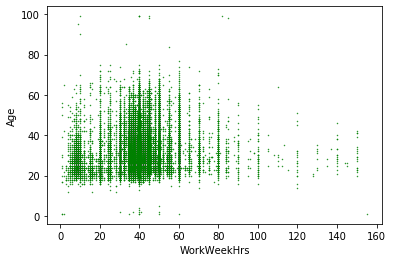

In [63]:
plt.scatter(df_answers['WorkWeekHrs'], df_answers['Age'], c ='green', s=0.2)
plt.xlabel('WorkWeekHrs')
plt.ylabel('Age')
plt.show()

In [64]:
# load new data with gender information
df_answers_2 = pd.read_csv('survey_results_public.csv', usecols=['Respondent', 'Gender', 'OpSys'],index_col = ['Respondent'])
df_answers_2.shape

(88883, 2)

In [65]:
df_answers_2.dropna(inplace=True)
df_answers_2.shape

(84781, 2)

In [66]:
# breakdown of data according to gender
df_men = df_answers_2.loc[df_answers_2['Gender']=='Man']
df_women = df_answers_2.loc[df_answers_2['Gender']=='Woman']

In [67]:
pd.unique(df_answers_2['OpSys'])
df_men.head(), df_women.head()

(                  OpSys Gender
 Respondent                    
 1               Windows    Man
 2               Windows    Man
 3           Linux-based    Man
 4               Windows    Man
 5           Linux-based    Man,
               OpSys Gender
 Respondent                
 12            MacOS  Woman
 31            MacOS  Woman
 35            MacOS  Woman
 51          Windows  Woman
 71            MacOS  Woman)

In [68]:
# count quantity for OpSys
df_men=df_men.groupby('OpSys')['Gender'].count().reset_index(name='Total Amount')
df_women=df_women.groupby('OpSys')['Gender'].count().reset_index(name='Total Amount')

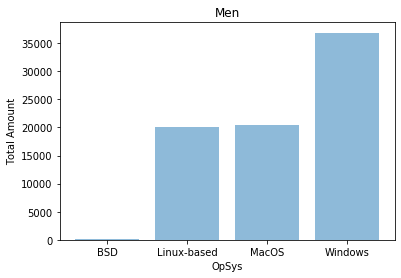

In [69]:
plt.bar(df_men['OpSys'], df_men['Total Amount'], alpha=0.5)
plt.xlabel('OpSys')
plt.ylabel('Total Amount')
plt.title('Men')
plt.show()

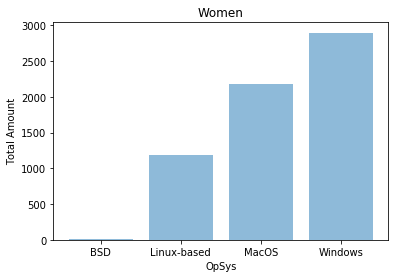

In [70]:
plt.bar(df_women['OpSys'], df_women['Total Amount'], alpha=0.5)
plt.xlabel('OpSys')
plt.ylabel('Total Amount')
plt.title('Women')
plt.show()